# Investigating the Scientific Method

In [9]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# create a pandas dataframe that has the growth of a plant as a function of the times you water it and it has a linear relationship

# data collected after 5 months
# data collected after 1 month of watering
data = { 'growth': [0, 2, 4,6, 8], 'watering frequency': [0,2,4,6,8]}
df = pd.DataFrame(data)
df 
# add noise to the growth
df['growth'] = df['growth'] + np.random.normal(0, 0.1, 5)
print(df)

     growth  watering frequency
0  0.055757                   0
1  2.060234                   2
2  3.900923                   4
3  6.050094                   6
4  7.944418                   8


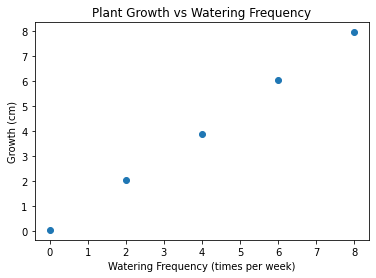

In [24]:
# plot the data
plt.scatter(df['watering frequency'], df['growth'])
# add labels to the plot
plt.xlabel('Watering Frequency (times per week)')
plt.ylabel('Growth (cm)')
plt.title('Plant Growth vs Watering Frequency')
plt.show()

In [25]:
from scipy.stats import linregress

# Perform linear regression on the data
slope, intercept, r_value, p_value, std_err = linregress(df['watering frequency'], df['growth'])

# Print the results
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("p-value:", p_value)
print("Standard Error:", std_err)

Slope: 0.9883590320331499
Intercept: 0.04884922868488761
R-squared: 0.9995726510993836
p-value: 3.7498892229550423e-06
Standard Error: 0.011798810364375318


In [26]:
#TODO: add information about the r-squared value
# r-squared is your correlation value 

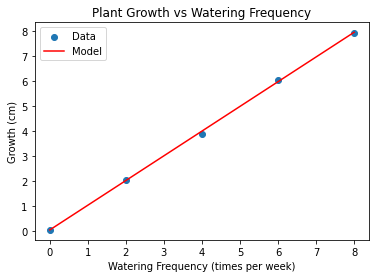

In [27]:
# Plot the data and the regression line
plt.scatter(df['watering frequency'], df['growth'])
plt.plot(df['watering frequency'], slope*df['watering frequency'] + intercept, color='red')
# add labels to the plot
plt.legend(['Data', 'Model'])

plt.xlabel('Watering Frequency (times per week)')
plt.ylabel('Growth (cm)')
plt.title('Plant Growth vs Watering Frequency')
plt.show()

In [ ]:
# how different is your model from the data?

## QUESTION
One of your friends has been watering their plant 3 times a week, how much growth would you expect after 5 months? what about 5, 7 times?

In [41]:
# they measured the following growth after 5 months
data2 = { 'growth': [0, 2, 2.5,3, 3], 'watering frequency': [1, 3, 5, 7, 9]}
# add random noise to growth
df2 = pd.DataFrame(data2)
df2['growth'] = df2['growth'] + np.random.normal(0, 0.1, 5)


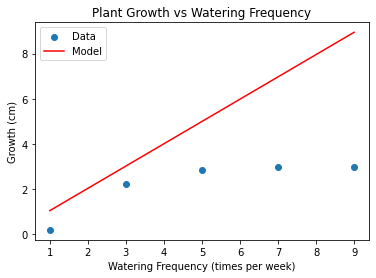

In [42]:
# plot new data and model
plt.scatter(df2['watering frequency'], df2['growth'])
plt.plot(df2['watering frequency'], slope*df2['watering frequency'] + intercept, color='red')
# add labels to the plot
plt.legend(['Data', 'Model'])
plt.xlabel('Watering Frequency (times per week)')
plt.ylabel('Growth (cm)')
plt.title('Plant Growth vs Watering Frequency')
plt.show()

a: 1.3205730466848158
b: 1.3813120825122174


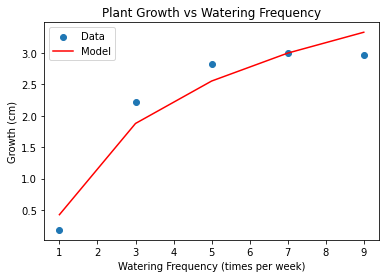

In [43]:
# is the model good?
# what would be a better fit?
# do a log fit to the second data
from scipy.optimize import curve_fit

def log_model(x, a, b):
    # equation for a log model
    return a * np.log(b * x)

# Fit the log model to the data
params, covariance = curve_fit(log_model, df2['watering frequency'], df2['growth'])

# Print the parameters
print("a:", params[0])
print("b:", params[1])

# Plot the data and the log model
plt.scatter(df2['watering frequency'], df2['growth'])
plt.plot(df2['watering frequency'], log_model(df2['watering frequency'], params[0], params[1]), color='red')
# add labels to the plot
plt.legend(['Data', 'Model'])
plt.xlabel('Watering Frequency (times per week)')
plt.ylabel('Growth (cm)')
plt.title('Plant Growth vs Watering Frequency')
plt.show()

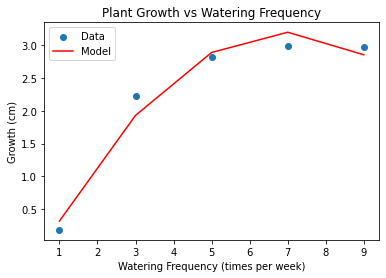

In [44]:
# try polynomial fit
def poly_model(x, a, b, c):
    # equation for a polynomial model
    return a * x**2 + b * x + c

# Fit the polynomial model to the data
params2, covariance2 = curve_fit(poly_model, df2['watering frequency'], df2['growth'])

# plot the data and the polynomial model
plt.scatter(df2['watering frequency'], df2['growth'])
plt.plot(df2['watering frequency'], poly_model(df2['watering frequency'], params2[0], params2[1], params2[2]), color='red')
# add labels to the plot
plt.legend(['Data', 'Model'])
plt.xlabel('Watering Frequency (times per week)')
plt.ylabel('Growth (cm)')
plt.title('Plant Growth vs Watering Frequency')
plt.show()


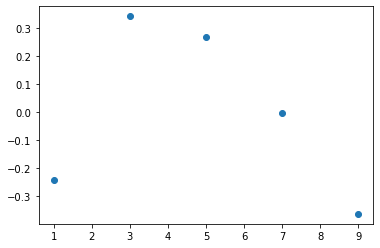

In [45]:
# try other things...
# check the goodness of the fit
# check the residuals
# check the p-value
# check the r-squared value
# check the standard error
# check the covariance matrix

# check the residuals
# calculate the residuals
residuals = df2['growth'] - log_model(df2['watering frequency'], params[0], params[1])
# plot the residuals
plt.scatter(df2['watering frequency'], residuals)